In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import copy

In [14]:
data_earth = pd.read_excel('Earth_1_year.xlsx', header = None)

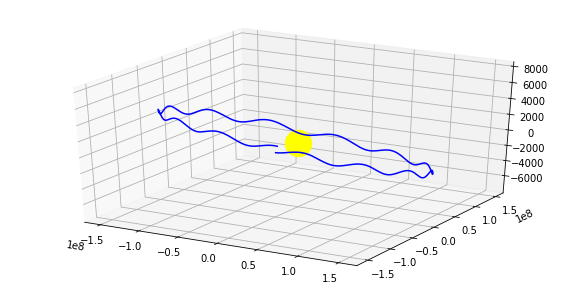

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot3D(data_earth[2].values, data_earth[3].values, data_earth[4].values, color = 'blue')
ax.scatter(0, 0, 0, color = 'yellow', s = 700)

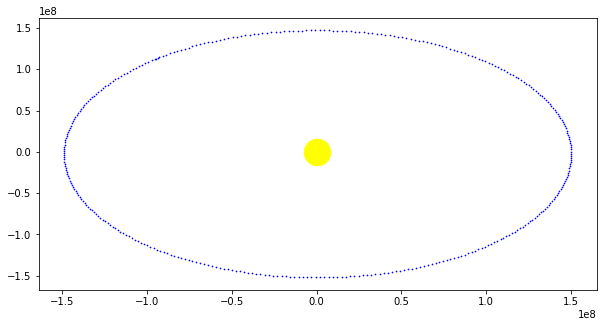

In [16]:
fig = plt.figure(figsize=(10,5))
plt.scatter(data_earth[2].values, data_earth[3].values, color = 'blue', s = 0.5)
plt.scatter(0, 0, color = 'yellow', s = 700)

In [17]:
a = (147.09 + 152.1)*1000000/2
c = a - 147.09 * 1000000
b = (a*a - c*c)**0.5

In [18]:
y_kepler = b * (1 - ((data_earth[2].values - 548301)*(data_earth[2].values - 548301))/(a*a))**0.5

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


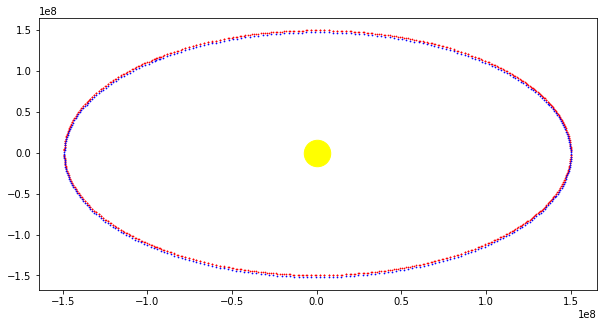

In [19]:
fig = plt.figure(figsize=(10,5))
plt.scatter(data_earth[2].values, y_kepler, color = 'red', s = 0.5)
plt.scatter(data_earth[2].values, -y_kepler, color = 'red', s = 0.5)
plt.scatter(data_earth[2].values, data_earth[3].values, color = 'blue', s = 0.5)
plt.scatter(0, 0, color = 'yellow', s = 700)

In [20]:
error_list = list()
for i in range(len(data_earth[2].values)):
    if data_earth[3].values[i] >=0:
        error = abs((data_earth[3].values[i] - (b * (1 - ((data_earth[2].values[i] - 548301)*(data_earth[2].values[i] - 548301))/(a*a))**0.5))/data_earth[2].values[i])
    if data_earth[3].values[i] < 0:
        error = abs((data_earth[3].values[i] - (- b * (1 - ((data_earth[2].values[i] - 548301)*(data_earth[2].values[i] - 548301))/(a*a))**0.5))/data_earth[2].values[i])
    error_list.append(error)
error_list

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


[0.026109039060943286,
 0.02557754947833816,
 0.025077444969947092,
 0.024606173430657068,
 0.024161363657095154,
 0.02374079926067213,
 0.02334239927143966,
 0.02296420921473518,
 0.02260440664644638,
 0.02226132358166413,
 0.021933483970982562,
 0.02161964771996387,
 0.021318846672194743,
 0.021030397262090984,
 0.0207538818321237,
 0.02048910263290558,
 0.020236021891046004,
 0.019994702983207765,
 0.01976526277562227,
 0.01954783829869209,
 0.01934256596064507,
 0.01914956954344943,
 0.018968953471900526,
 0.01880079906678596,
 0.01864516275836624,
 0.018502076070959047,
 0.018371547454466963,
 0.01825356582505974,
 0.018148105199656102,
 0.01805512931616032,
 0.017974594829619422,
 0.017906451703587456,
 0.017850639890987438,
 0.01780708251205781,
 0.01777567783127423,
 0.017756295900468094,
 0.017748791137917764,
 0.01775304895651256,
 0.017769090815439842,
 0.017797264146910415,
 0.0178385393943411,
 0.017894932198397478,
 0.017970085375014964,
 0.01807011678993138,
 0.018205013

In [21]:
error_list = [x for x in error_list if str(x) != 'nan']
np.mean(error_list)

0.07812578462552837

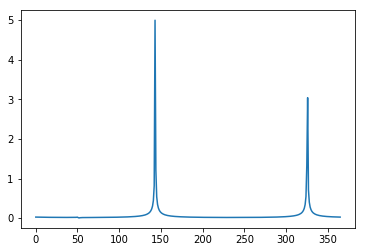

In [22]:
plt.plot(error_list)

In [23]:
error_list = [x for x in error_list if x < 1]
np.mean(error_list)

0.04978227395598782

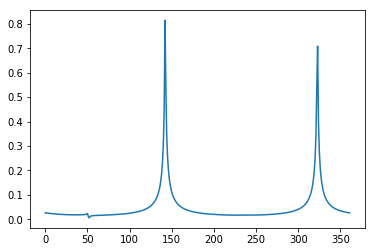

In [24]:
plt.plot(error_list)